In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_csv.csv')

# Check Number of Columns

In [31]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Check for Null Values

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df['Loan_Status'].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

From above code we get that 68% of loan in train data got approved and 31% is not approved

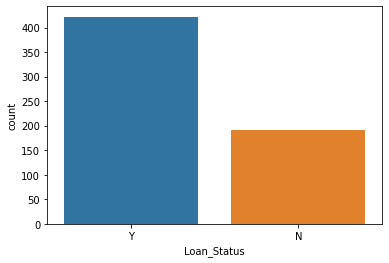

In [20]:
sns.countplot(x='Loan_Status',data=df)
plt.show()

# Analyzing Categorical variable in dataset


In [9]:
categorical_columns1 = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History']
for i in categorical_columns1:
    print(df[i].value_counts(normalize=True)*100)
    

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64
Yes    65.139116
No     34.860884
Name: Married, dtype: float64
0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64
Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64
No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64
1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64


# Lets Visualize it trhiugh graph

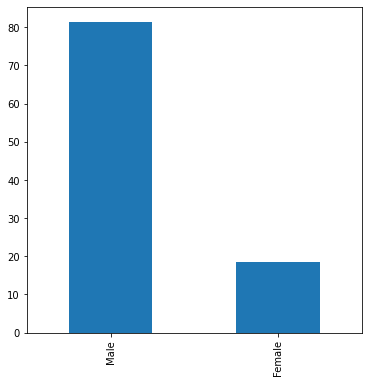

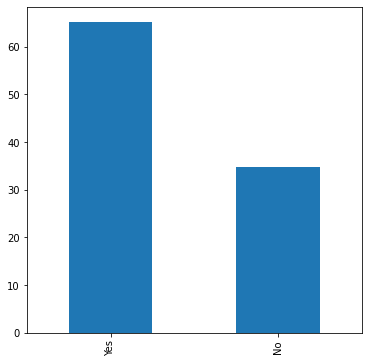

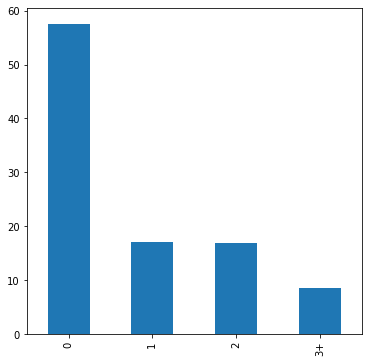

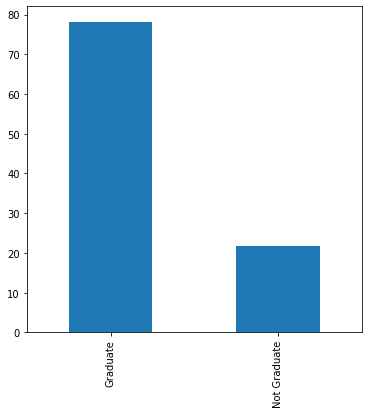

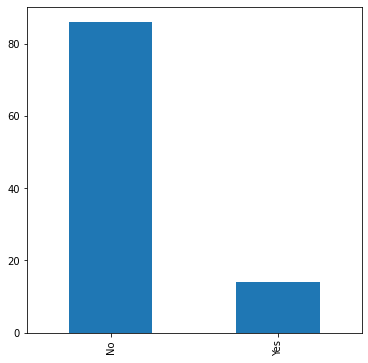

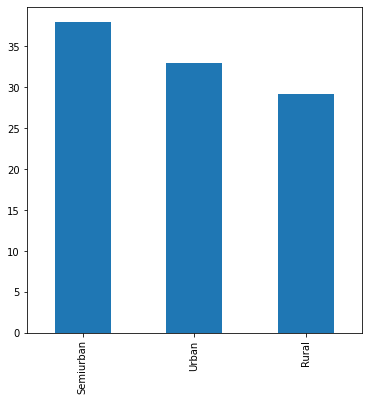

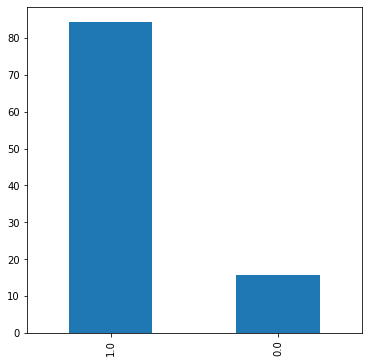

In [15]:
for i in categorical_columns1:
    j=df[i].value_counts(normalize=True)*100
    j.plot(kind = 'bar', stacked = False, figsize = (6,6))
    plt.show()
    

# Start Analazing Numerical Data

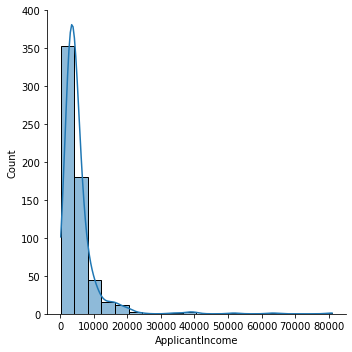

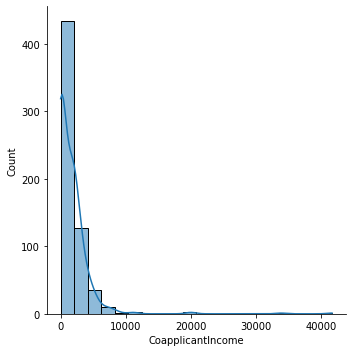

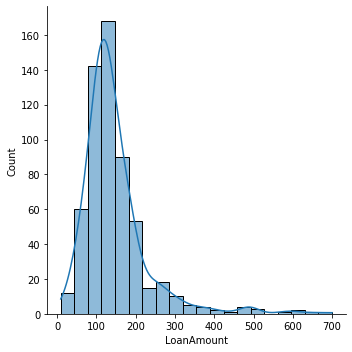

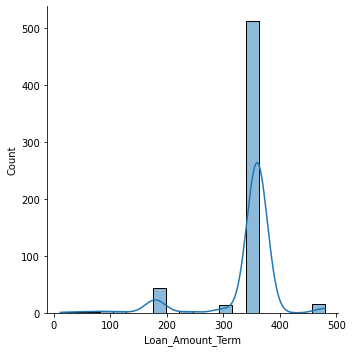

In [22]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
for i in numerical_columns:
    sns.displot(x= i,data=df,bins=20,kde= True)
    plt.show()

# Relationship between target variable and categorical variable

Gender          Female       Male
Loan_Status                      
N            33.035714  30.674847
Y            66.964286  69.325153
Married             No       Yes
Loan_Status                     
N            37.089202  28.39196
Y            62.910798  71.60804
Dependents           0          1          2         3+
Loan_Status                                            
N            31.014493  35.294118  24.752475  35.294118
Y            68.985507  64.705882  75.247525  64.705882
Education     Graduate  Not Graduate
Loan_Status                         
N            29.166667      38.80597
Y            70.833333      61.19403
Self_Employed    No        Yes
Loan_Status                   
N              31.4  31.707317
Y              68.6  68.292683
Property_Area      Rural  Semiurban      Urban
Loan_Status                                   
N              38.547486  23.175966  34.158416
Y              61.452514  76.824034  65.841584
Credit_History        0.0        1.0
Loan_Status

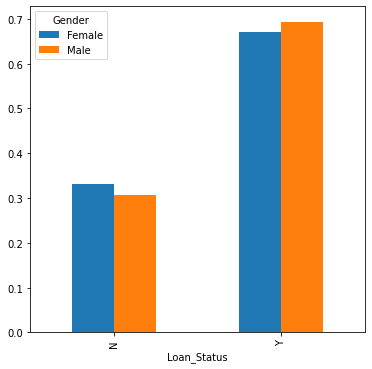

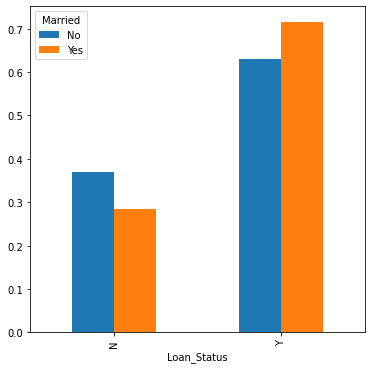

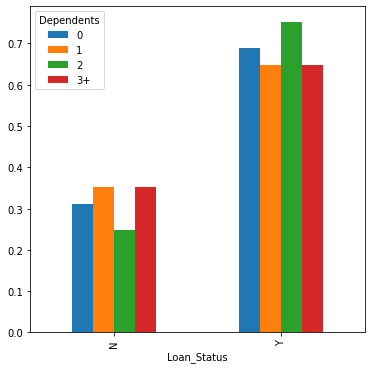

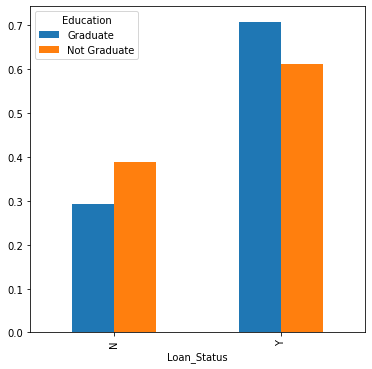

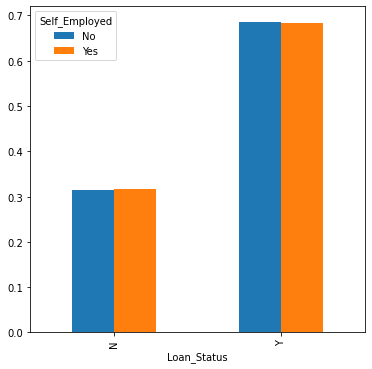

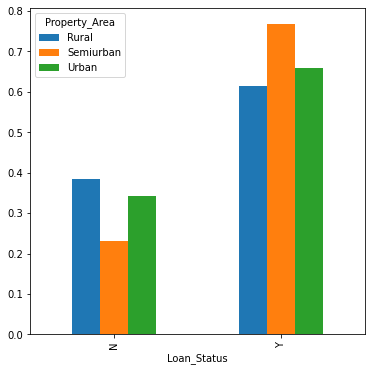

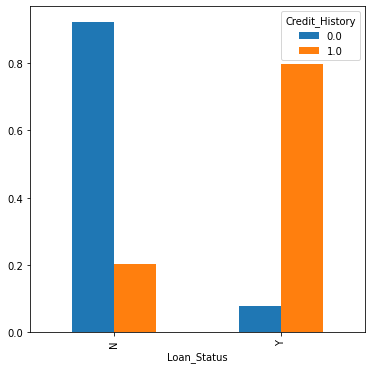

In [6]:
categorical_columns1 = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History']
for i in categorical_columns1 :
    j = pd.crosstab(df['Loan_Status'],df[i],normalize = 'columns')
    print(j*100)
    j.plot(kind = 'bar', stacked = False, figsize = (6,6))

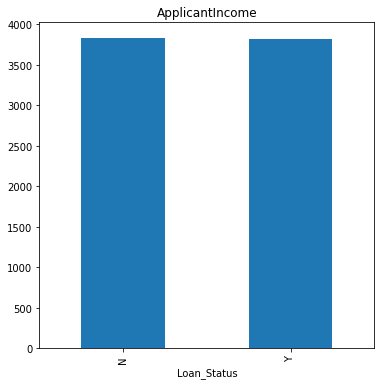

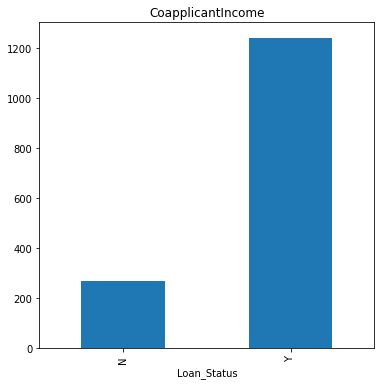

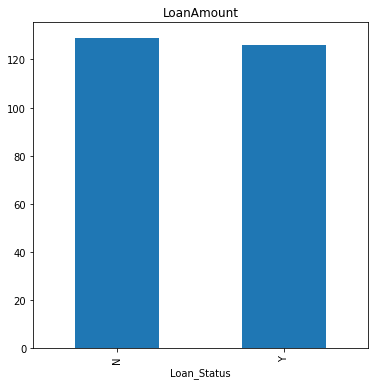

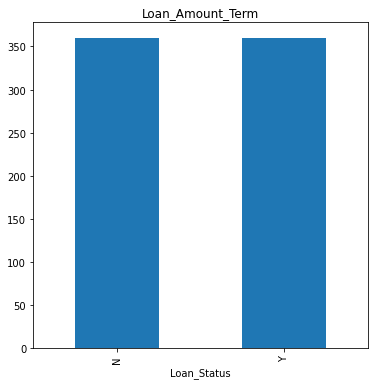

In [32]:
for i in numerical_columns:
    df.groupby('Loan_Status')[i].median().plot(kind = 'bar', stacked = False, figsize = (6,6),title=i)
    plt.show()

From above graph we can infer:
Higher median co-applicant income have high cance of loan approval
Lesser median loan amount have more number of loans approved but is not very clear from above graph
No significance relationship can be drwan between application income and loan status and  with loan amount and loan status

Lets Create bins for application income and loan amount for visualizing it in a more clear way

ApplicantIncome      Low   Average     High  Very High
Loan_Status                                           
N                0.30719  0.313725  0.30719   0.318182
Y                0.69281  0.686275  0.69281   0.681818
LoanAmount        Low   Average      High  Very High
Loan_Status                                         
N            0.300654  0.282895  0.278571   0.356164
Y            0.699346  0.717105  0.721429   0.643836


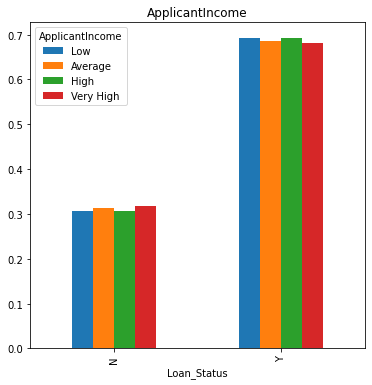

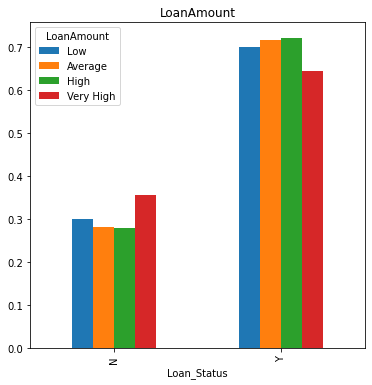

In [6]:
from numpy import nanpercentile
coulumns_to_be_analysed = ['ApplicantIncome', 'LoanAmount']
for  i in coulumns_to_be_analysed:
    a = int(df[i].min())
    b = int(nanpercentile(df[i],25))
    c = int(nanpercentile(df[i],50))
    d = int(nanpercentile(df[i],75))
    e = int(df[i].max())
    bins = [a,b,c,d,e] 
    group = ['Low','Average', 'High','Very High']
    j = pd.cut(df[i],bins , labels = group)
    r =  pd.crosstab(df['Loan_Status'],j,normalize = 'columns')
    r.plot(kind = 'bar', stacked = False, figsize = (6,6),title = i)
    print(r)

Higher loan amount has higher chance of loan rejection
Applicant income does not impact  loan approval rate also we can see low appliacnt income has slightly higer chance of loan approval which is not valid conclusion ,so we can combine the total income of the applicants for more visualization

TotalIncome       Low   Average      High  Very High
Loan_Status                                         
N            0.318182  0.315789  0.287582   0.324675
Y            0.681818  0.684211  0.712418   0.675325


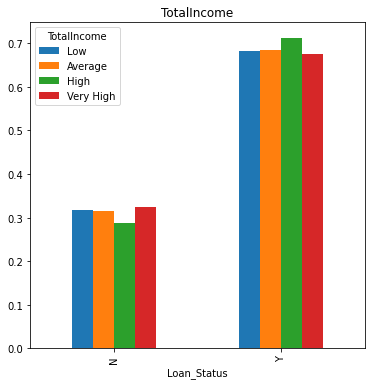

In [7]:
df['TotalIncome'] = df['ApplicantIncome']+df['CoapplicantIncome']
TotlaIncome = ['TotalIncome']
for  i in TotlaIncome:
    a = int(df[i].min())
    b = int(nanpercentile(df[i],25))
    c = int(nanpercentile(df[i],50))
    d = int(nanpercentile(df[i],75))
    e = int(df[i].max())
    bins = [a,b,c,d,e] 
    group = ['Low','Average', 'High','Very High']
    j = pd.cut(df[i],bins , labels = group)
    r =  pd.crosstab(df['Loan_Status'],j,normalize = 'columns')
    r.plot(kind = 'bar', stacked = False, figsize = (6,6),title = i)
    print(r)


With this graph we can easily conclude that applicants with higher income has higher loan approval rate

From above visualization we can conculde the required feature which impacts loan approval rate:               
Gender               
Married               
Dependents           
Education                     
ApplicantIncome       
CoapplicantIncome     
LoanAmount           
Loan_Amount_Term     
Credit_History       
Property_Area         
Loan_Status 

## Spliting Data to x and y

In [18]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [16]:
X=df.iloc[:,1:12].values
Y=df.iloc[:,-2].values


In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2,3,4,10])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 1.0 0.0 ... nan 360.0 1.0]
 [0.0 1.0 0.0 ... 128.0 360.0 1.0]
 [0.0 1.0 0.0 ... 66.0 360.0 1.0]
 ...
 [0.0 1.0 0.0 ... 253.0 360.0 1.0]
 [0.0 1.0 0.0 ... 187.0 360.0 1.0]
 [1.0 0.0 0.0 ... 133.0 360.0 0.0]]


In [29]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y[:] = labelencoder.fit_transform(Y[:])

In [21]:
Y=Y.astype('int')

In [22]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp_fit = imp.fit(X)
X = imp_fit.transform(X)

Splitting the data into train and test

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Scaling of data


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Start Implementing Different type of classifier and check the accuracy

In [26]:
from sklearn.linear_model import LogisticRegression
classifier_Logistic = LogisticRegression(random_state = 0)
classifier_Logistic.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [27]:
y_pred=classifier_Logistic.predict(X_test)

In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
cm = confusion_matrix(y_test, y_pred)
print('Accuracy  is :',accuracy_score(y_test,y_pred))
print('Precision Socre is :',precision_score(y_test,y_pred))
print('Recall Socre is :',recall_score(y_test,y_pred))
print(cm)

Accuracy  is : 0.8373983739837398
Precision Socre is : 0.8301886792452831
Recall Socre is : 0.9777777777777777
[[15 18]
 [ 2 88]]


In [32]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_decisiontree = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35, random_state = 0)
classifier_decisiontree.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_decisiontree.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmDecisiontree = confusion_matrix(y_test, y_pred)
print(cmDecisiontree)
print('Accuracy  is :',accuracy_score(y_test,y_pred))
print('Precision Socre is :',precision_score(y_test,y_pred))
print('Recall Socre is :',recall_score(y_test,y_pred))

[[14 19]
 [ 2 88]]
Accuracy  is : 0.8292682926829268
Precision Socre is : 0.822429906542056
Recall Socre is : 0.9777777777777777


In [37]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_random = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0)
classifier_random.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_random.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmRandom = confusion_matrix(y_test, y_pred)
print('Accuracy  is :',accuracy_score(y_test,y_pred))
print('Precision Socre is :',precision_score(y_test,y_pred))
print('Recall Socre is :',recall_score(y_test,y_pred))
print(cmRandom)

Accuracy  is : 0.7886178861788617
Precision Socre is : 0.826530612244898
Recall Socre is : 0.9
[[16 17]
 [ 9 81]]


In [34]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifierSVM = SVC(kernel = 'rbf', random_state = 0)
classifierSVM.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifierSVM.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmSVM = confusion_matrix(y_test, y_pred)
print('Accuracy  is :',accuracy_score(y_test,y_pred))
print('Precision Socre is :',precision_score(y_test,y_pred))
print('Recall Socre is :',recall_score(y_test,y_pred))
print(cmSVM)

Accuracy  is : 0.8292682926829268
Precision Socre is : 0.822429906542056
Recall Socre is : 0.9777777777777777
[[14 19]
 [ 2 88]]
